In [1]:
#import the libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data from csv to dataframe
weather_data=pd.read_csv(r'weather_dataset.csv')

In [3]:
#View the first 5 records of the dataset.
weather_data.head()

,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [4]:
#Find the statistical information about the dataset
weather_data.describe()

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
count,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000
mean,0.579090,6.343128,15.650242,2016.018933,56.089112,66.042406,45.642716,18.791316,6.329820
std,0.988057,3.490723,8.923425,0.136294,18.798295,19.787954,18.559263,6.461527,3.494785
min,0.000000,1.000000,1.000000,2016.000000,-27.000000,-19.000000,-35.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,2016.000000,44.000000,53.000000,33.000000,15.000000,4.040000
50%,0.190000,6.000000,16.000000,2016.000000,58.000000,68.000000,47.000000,19.000000,5.940000
75%,0.750000,9.000000,24.000000,2016.000000,71.000000,82.000000,60.000000,23.000000,8.080000
max,20.890000,12.000000,31.000000,2017.000000,100.000000,111.000000,88.000000,36.000000,61.100000


In [10]:
#Importing datatime function to able to perform date conversion and analysis
from datetime import datetime

# Assuming weather_data['Date.Full'] contains string dates in the format 'YYYY-MM-DD'
min_dt_str = weather_data['Date.Full'].min()
max_dt_str = weather_data['Date.Full'].max()

# Convert string dates to datetime objects
min_dt = datetime.strptime(min_dt_str, '%Y-%m-%d')
max_dt = datetime.strptime(max_dt_str, '%Y-%m-%d')

# Printing minimum and maximum dates
print('Minimum date: ' + min_dt_str + ', Maximum date: ' + max_dt_str)

# Calculating the difference in days
difference = max_dt - min_dt
print("Number of days: "+ str(difference.days))


Minimum date: 2016-01-03, Maximum date: 2017-01-01
Number of days: 364


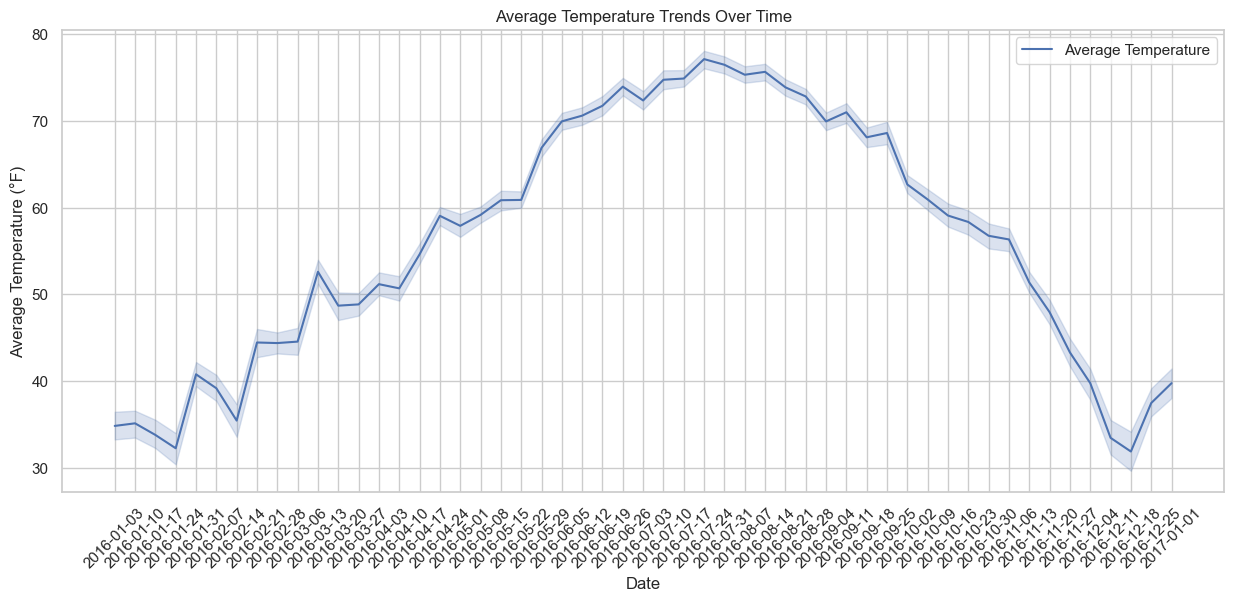

In [12]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Analyzing temperature trends
plt.figure(figsize=(15, 6))
sns.lineplot(data=weather_data, x="Date.Full", y="Data.Temperature.Avg Temp", label="Average Temperature")
plt.title("Average Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°F)")
plt.xticks(rotation=45)
plt.show()

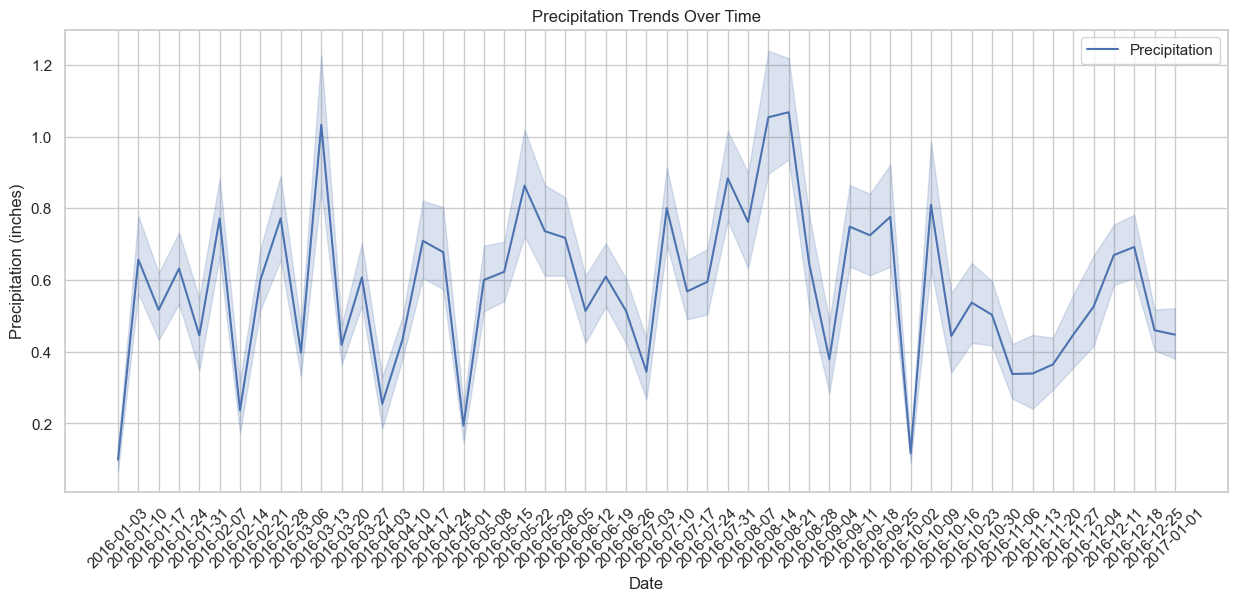

In [22]:
# Analyzing precipitation patterns
plt.figure(figsize=(15, 6))
sns.lineplot(data=weather_data, x="Date.Full", y="Data.Precipitation", label="Precipitation")
plt.title("Precipitation Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)
plt.show()

## Observation
The graph shows significant fluctuations in precipitation levels over the period displayed. The data is marked by peaks and troughs indicating variable rainfall across different dates.The graph shows significant volatility in precipitation levels. There are sharp increases and decreases, suggesting that there are days with heavy rainfall followed by periods of little to no rain. Around the middle of the time period shown, there's a sustained rise in precipitation, indicating a possibly wetter period or season.Towards the end of the period, there's a notable decline in precipitation. This could suggest the end of a rainy season or a transition to a drier period.

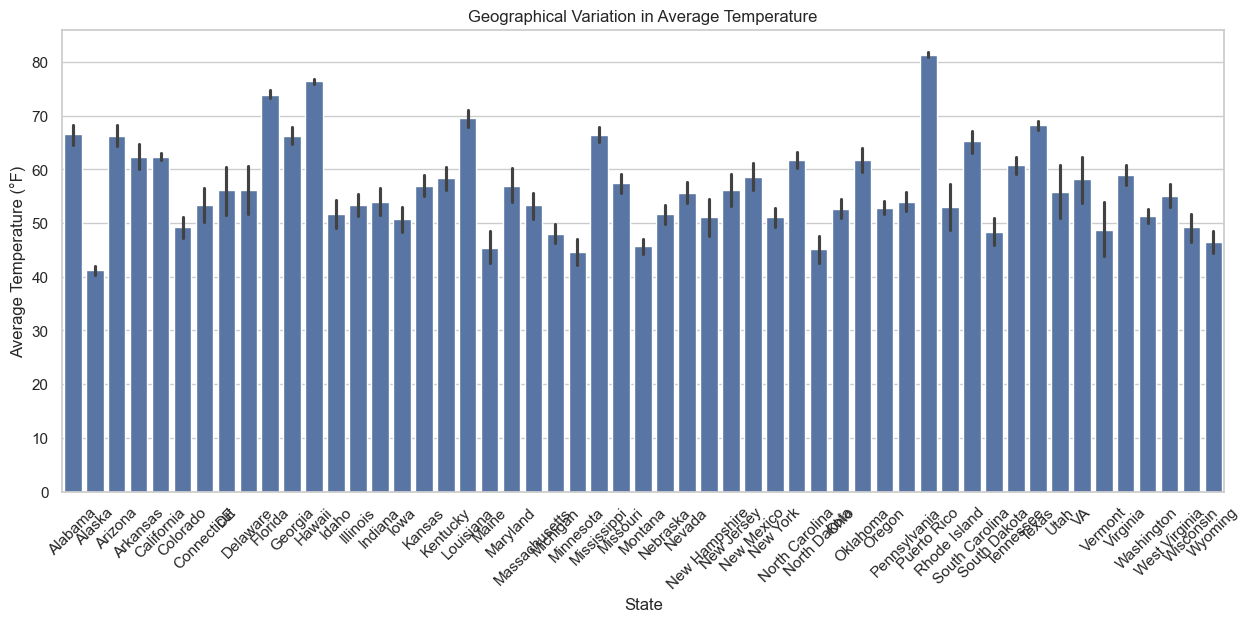

In [23]:
# Geographical variation in average temperature
plt.figure(figsize=(15, 6))
sns.barplot(data=weather_data, x="Station.State", y="Data.Temperature.Avg Temp")
plt.title("Geographical Variation in Average Temperature")
plt.xlabel("State")
plt.ylabel("Average Temperature (°F)")
plt.xticks(rotation=45)
plt.show()

In [24]:
from datetime import datetime


In [11]:
# Convert 'Date.Full' to datetime format for easier manipulation

weather_data['Date.Full'] = pd.to_datetime(weather_data['Date.Full'])


In [12]:
# Yearly Trends in Average Temperature

yearly_avg_temp = weather_data.groupby(weather_data['Date.Full'].dt.year)['Data.Temperature.Avg Temp'].mean()

In [13]:
# Monthly Precipitation Patterns

monthly_precipitation = weather_data.groupby(weather_data['Date.Full'].dt.month)['Data.Precipitation'].mean()

In [14]:
#Wind Speed Analysis

yearly_avg_wind_speed = weather_data.groupby(weather_data['Date.Full'].dt.year)['Data.Wind.Speed'].mean()

In [15]:
# 4. Extremes in Temperature and Precipitation

max_temp = weather_data['Data.Temperature.Max Temp'].max()

min_temp = weather_data['Data.Temperature.Min Temp'].min()

max_precipitation = weather_data['Data.Precipitation'].max()

In [16]:
# 5. State-wise Average Temperature Comparison

statewise_avg_temp = weather_data.groupby('Station.State')['Data.Temperature.Avg Temp'].mean()

# Preparing data for plotting

yearly_avg_temp_df = yearly_avg_temp.reset_index()

monthly_precipitation_df = monthly_precipitation.reset_index()

yearly_avg_wind_speed_df = yearly_avg_wind_speed.reset_index()

statewise_avg_temp_df = statewise_avg_temp.reset_index()


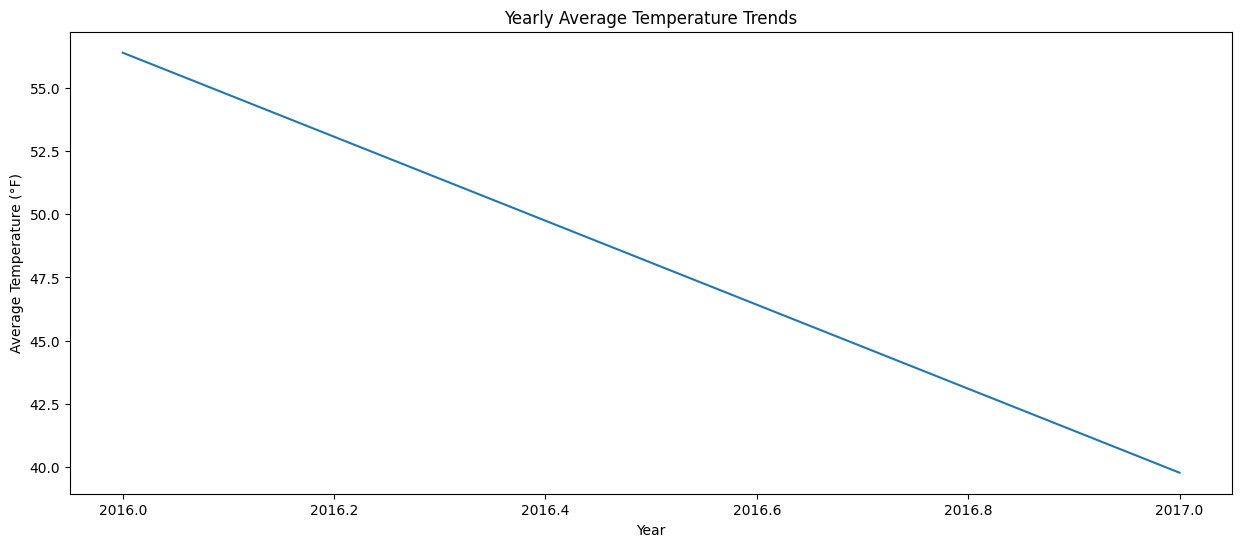

In [17]:
# Plotting the results

plt.figure(figsize=(15, 6))

sns.lineplot(data=yearly_avg_temp_df, x='Date.Full', y='Data.Temperature.Avg Temp')

plt.title('Yearly Average Temperature Trends')

plt.xlabel('Year')

plt.ylabel('Average Temperature (°F)')

plt.show()


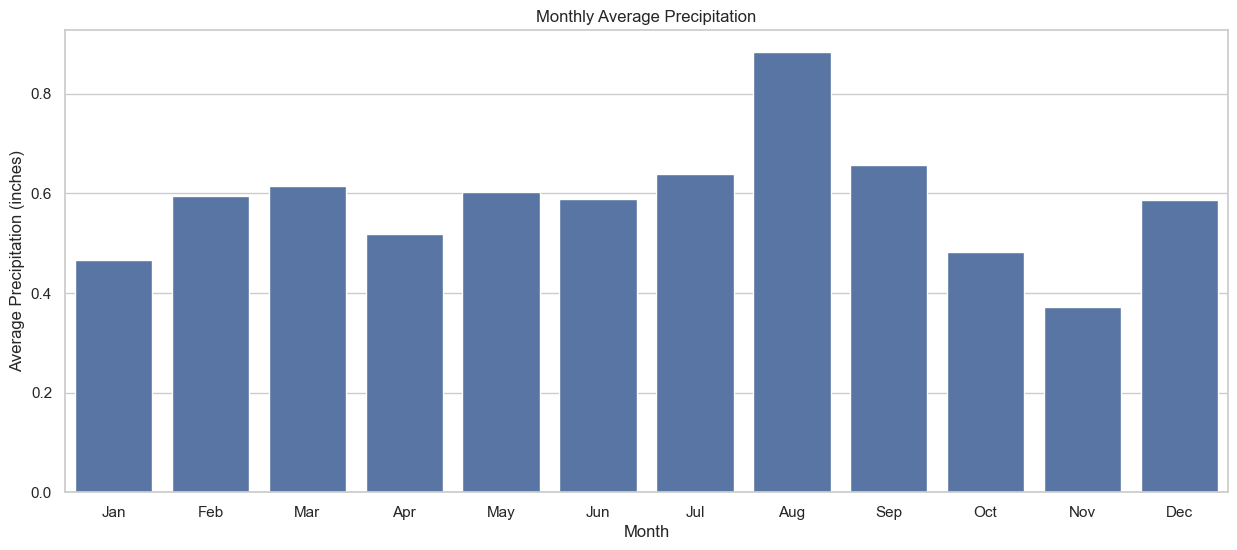

In [34]:
plt.figure(figsize=(15, 6))

sns.barplot(data=monthly_precipitation_df, x='Date.Full', y='Data.Precipitation')

plt.title('Monthly Average Precipitation')

plt.xlabel('Month')

plt.ylabel('Average Precipitation (inches)')

plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


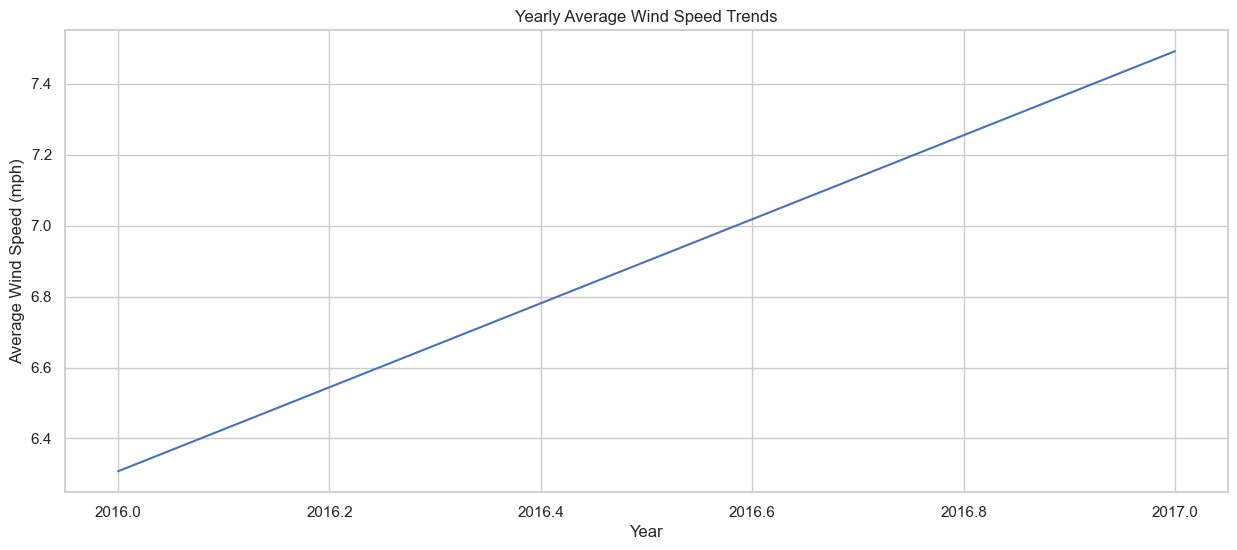

In [35]:
plt.figure(figsize=(15, 6))

sns.lineplot(data=yearly_avg_wind_speed_df, x='Date.Full', y='Data.Wind.Speed')
plt.title('Yearly Average Wind Speed Trends')
plt.xlabel('Year')
plt.ylabel('Average Wind Speed (mph)')
plt.show()


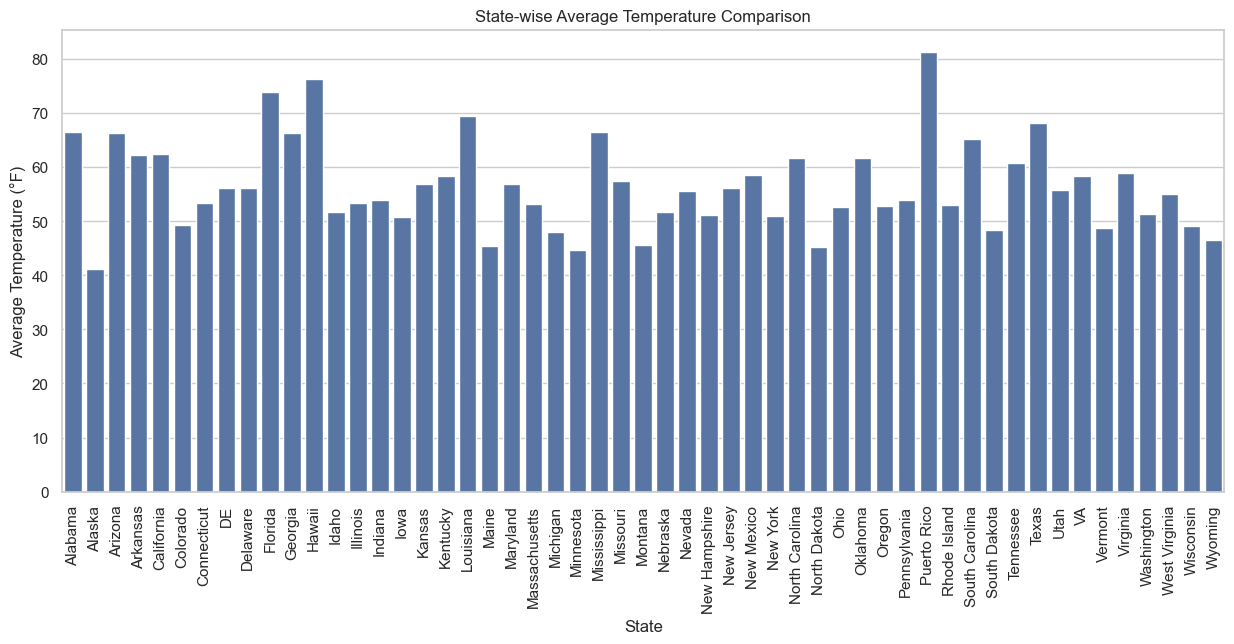

In [36]:
plt.figure(figsize=(15, 6))

sns.barplot(data=statewise_avg_temp_df, x='Station.State', y='Data.Temperature.Avg Temp')

plt.title('State-wise Average Temperature Comparison')
plt.xlabel('State')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=90)
plt.show()

### Observation
This graph is a heat map that vividly illustrates the weather conditions across various U.S. states and territories. It notably highlights Puerto Rico, which stands out with an average temperature of approximately 82°F. The map uses a spectrum of colors to represent temperature variations, clearly indicating Puerto Rico's warm, tropical climate. This color gradient effectively contrasts the island's climate against the cooler temperatures in other regions. The heat map serves not only as a visual representation of current climatic conditions but also provides insights into regional differences in weather patterns. Its depiction of Puerto Rico's distinctly higher temperature is particularly useful for understanding its year-round warm weather, with implications for sectors like tourism, agriculture, and energy.

In [19]:
# Temperature Patterns by State
statewise_temp_patterns = weather_data.groupby(['Station.State', weather_data['Date.Full'].dt.month])['Data.Temperature.Avg Temp'].mean().unstack()

# Precipitation Patterns by State
statewise_precip_patterns = weather_data.groupby(['Station.State', weather_data['Date.Full'].dt.month])['Data.Precipitation'].mean().unstack()

# Wind Speed Patterns by State
statewise_wind_patterns = weather_data.groupby(['Station.State', weather_data['Date.Full'].dt.month])['Data.Wind.Speed'].mean().unstack()

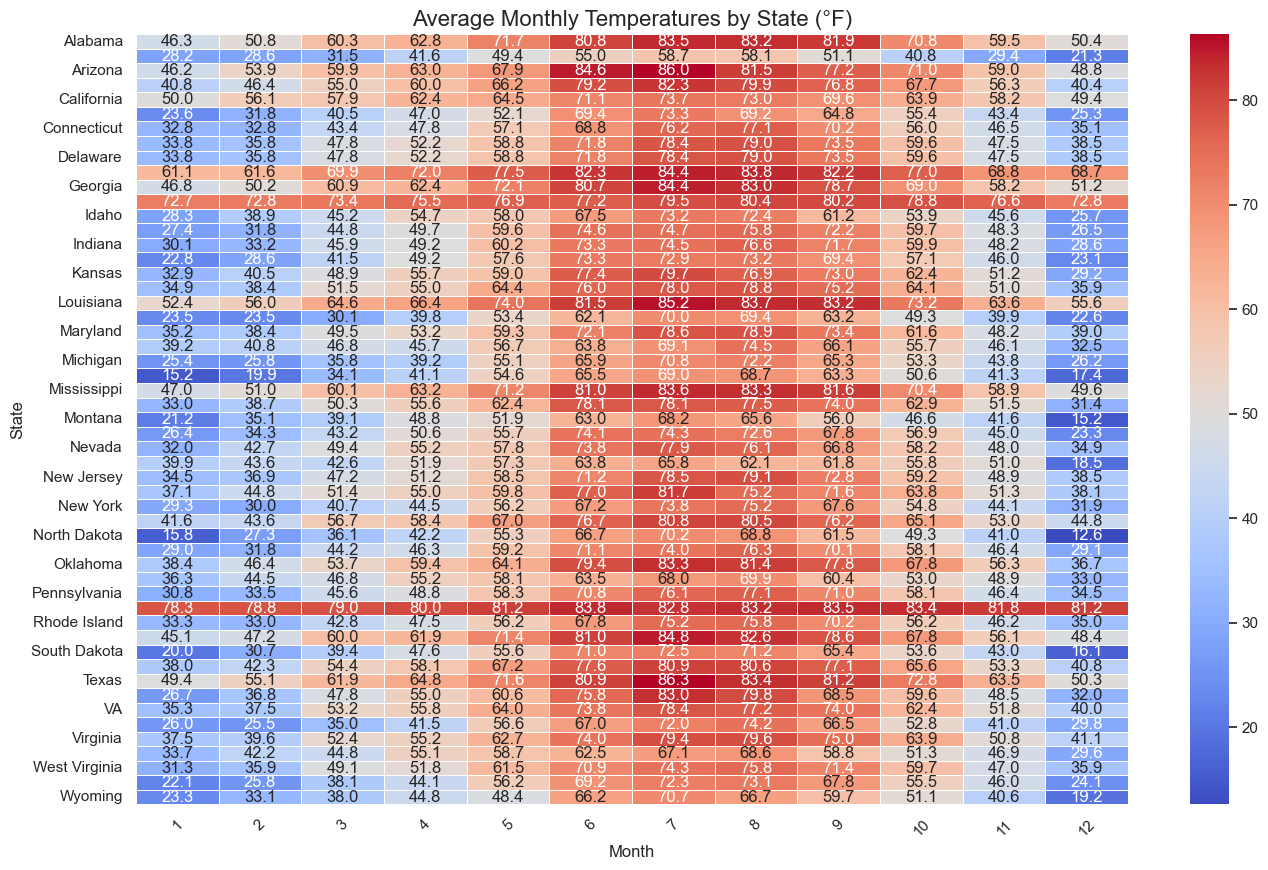

In [20]:
# Setting up the dimensions and style of the heatmap
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Creating the heatmap
ax = sns.heatmap(statewise_temp_patterns, annot=True, cmap="coolwarm", fmt=".1f", linewidths=.5)

# Setting the titles and labels
ax.set_title('Average Monthly Temperatures by State (°F)', fontsize=16)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

In [38]:
# Defining the comfortable temperature range
comfortable_min, comfortable_max = 60, 80

# Function to find states with temperatures in the comfortable range for each month
def recommend_states_for_month(monthly_data, month):
    # Filtering states with average temperatures in the comfortable range
    suitable_states = monthly_data[(monthly_data[month] >= comfortable_min) & 
                                   (monthly_data[month] <= comfortable_max)]
    # Sorting states to get the closest to the middle of the comfortable range
    suitable_states = suitable_states[month].sort_values(key=lambda x: abs(x - (comfortable_min + comfortable_max) / 2))
    # Returning the top 3 states, if available
    return suitable_states.head(3)

# Dictionary to store recommendations for each month
monthly_recommendations = {}

# Looping through each month to get recommendations
for month in range(1, 13):
    monthly_recommendations[month] = recommend_states_for_month(statewise_temp_patterns, month)

monthly_recommendations



{1: Station.State
 Hawaii         72.733333
 Puerto Rico    78.333333
 Florida        61.125000
 Name: 1, dtype: float64,
 2: Station.State
 Hawaii         72.8000
 Florida        61.5625
 Puerto Rico    78.7500
 Name: 2, dtype: float64,
 3: Station.State
 Florida      69.854167
 Hawaii       73.400000
 Louisiana    64.600000
 Name: 3, dtype: float64,
 4: Station.State
 Florida      71.958333
 Louisiana    66.400000
 Texas        64.791667
 Name: 4, dtype: float64,
 5: Station.State
 Mississippi       71.200
 South Carolina    71.400
 Texas             71.575
 Name: 5, dtype: float64,
 6: Station.State
 Colorado        69.416667
 Pennsylvania    70.785714
 Wisconsin       69.187500
 Name: 6, dtype: float64,
 7: Station.State
 Maine           70.00
 North Dakota    70.24
 Wyoming         70.72
 Name: 7, dtype: float64,
 8: Station.State
 Oregon      69.937500
 Maine       69.416667
 Colorado    69.250000
 Name: 8, dtype: float64,
 9: Station.State
 Ohio            70.107143
 Rhode Islan

A temperature heatmap displays the temperatures of different states throughout each month, offering valuable insights into the seasonal temperature patterns across various regions.

The weather conditions tend to be warmer during the months of June, July, and August, coinciding with the summer season across all states.

**January**: Hawaii, Puerto Rico, Florida
**February**: Hawaii, Florida, Puerto Rico
**March**: Florida, Hawaii, Louisiana
**April**: Florida, Louisiana, Texas
**May**: Mississippi, South Carolina, Texas
**June**: Colorado, Pennsylvania, Wisconsin
**July**: Maine, North Dakota, Wyoming
**August**: Oregon, Maine, Colorado
**September**: Ohio, Rhode Island, Connecticut
**October**: Mississippi, Alabama, Georgia
**November**: Florida, Louisiana, Texas
**December**: Florida, Hawaii

In [21]:
#Calculating the top 5 states with the highest average temperatures
top_temp_states = weather_data.groupby('Station.State')['Data.Temperature.Avg Temp'].mean().nlargest(5)


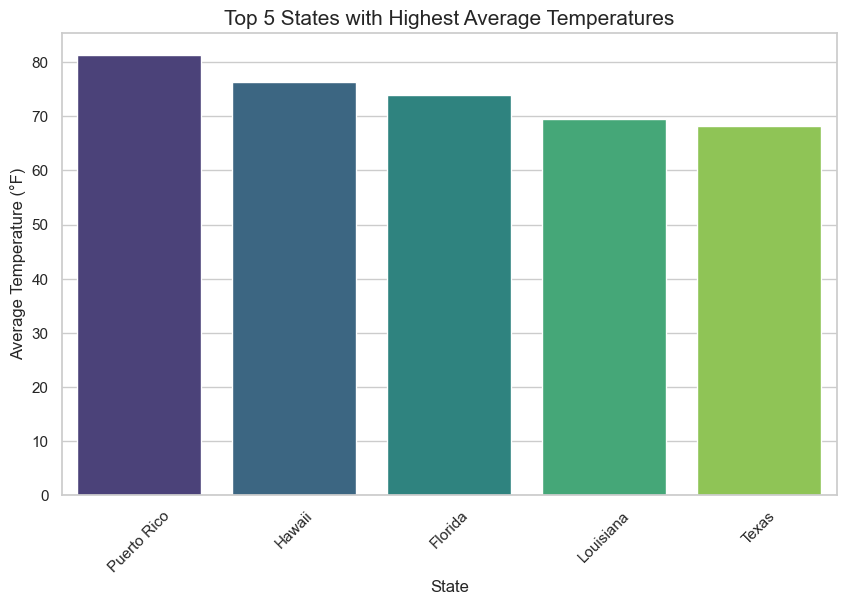

In [23]:

# Creating a bar chart for top 5 states by average temperature
plt.figure(figsize=(10, 6))
sns.barplot(x=top_temp_states.index, y=top_temp_states.values, hue=top_temp_states.index, palette="viridis", legend=False)
plt.title('Top 5 States with Highest Average Temperatures', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Temperature (°F)', fontsize=12)
plt.xticks(rotation=45)
plt.show()



In [24]:
# Calculating the top 5 states with the highest average precipitation
top_precip_states = weather_data.groupby('Station.State')['Data.Precipitation'].mean().nlargest(5)


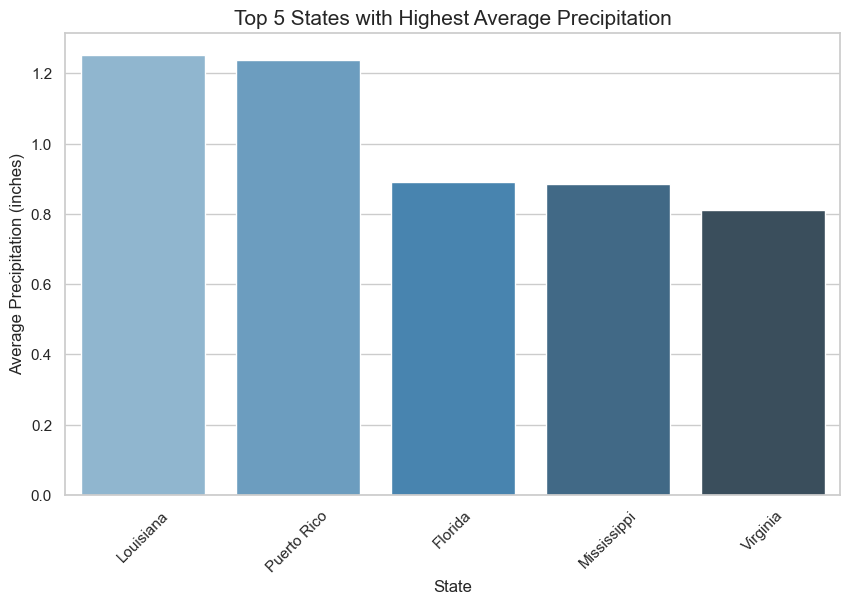

In [26]:

# Creating a bar chart for top 5 states by average precipitation
plt.figure(figsize=(10, 6))
sns.barplot(x=top_precip_states.index, y=top_precip_states.values,hue=top_precip_states.index, palette="Blues_d")
plt.title('Top 5 States with Highest Average Precipitation', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Precipitation (inches)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [34]:
# Calculating the top 5 states with the highest average wind speeds
top_wind_states = weather_data.groupby('Station.State')['Data.Wind.Speed'].mean().nlargest(5)


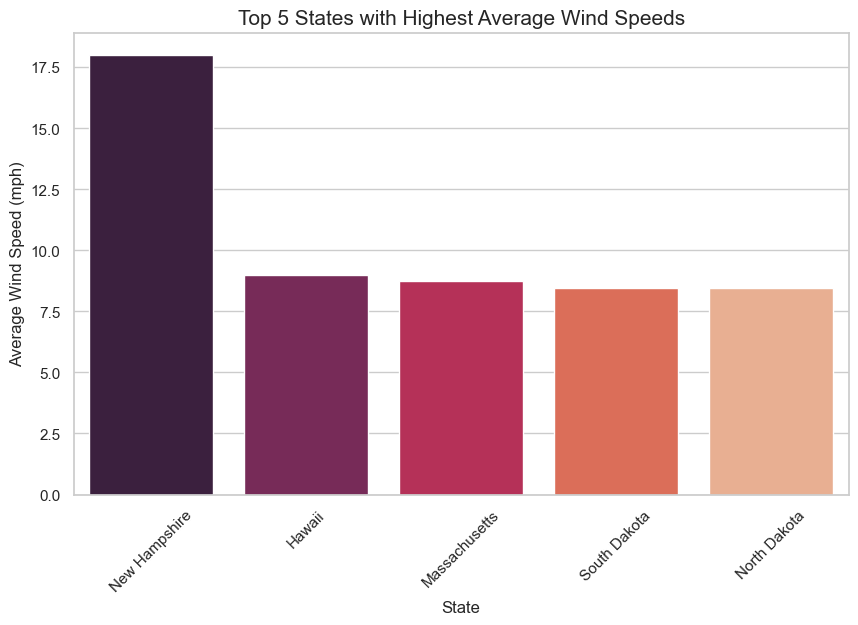

In [36]:

# Creating a bar chart for top 5 states by average wind speed
plt.figure(figsize=(10, 6))
sns.barplot(x=top_wind_states.index,hue=top_wind_states.index, y=top_wind_states.values, palette="rocket")
plt.title('Top 5 States with Highest Average Wind Speeds', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Wind Speed (mph)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [28]:
# Filtering the data for Puerto Rico
puerto_rico_data = weather_data[weather_data['Station.State'] == 'Puerto Rico']

# Grouping by full date to get average temperature over time for Puerto Rico
puerto_rico_temp_over_time = puerto_rico_data.groupby('Date.Full')['Data.Temperature.Avg Temp'].mean()


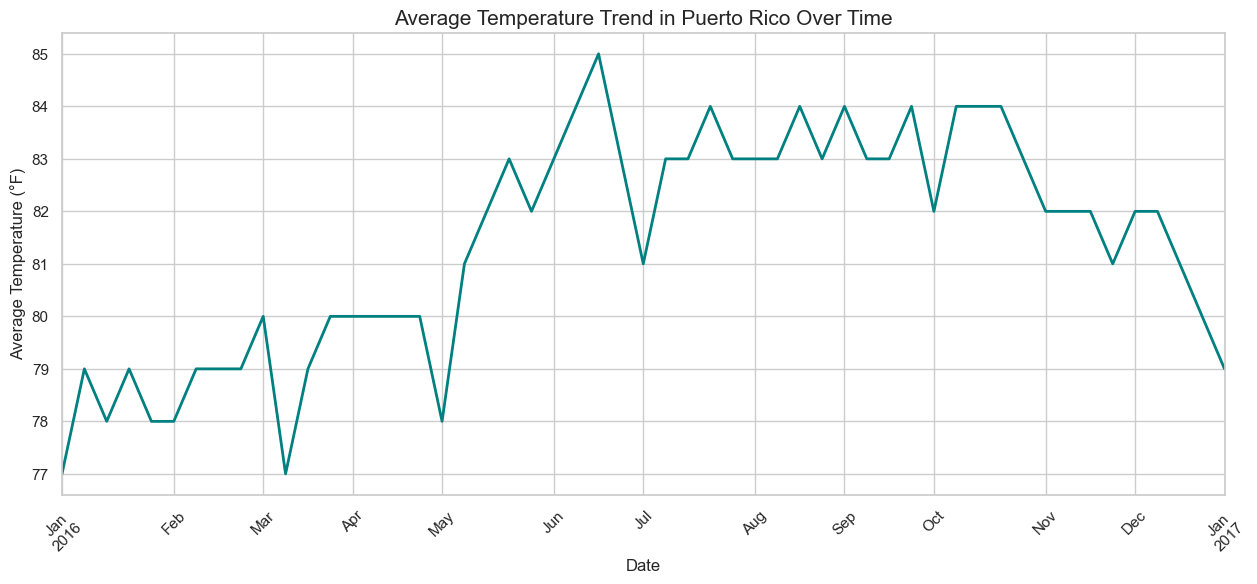

In [29]:

# Creating a line plot for temperature trend in Puerto Rico
plt.figure(figsize=(15, 6))
puerto_rico_temp_over_time.plot(color='teal', linewidth=2)
plt.title('Average Temperature Trend in Puerto Rico Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature (°F)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [30]:
# Define the seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Fall'

In [31]:
# Apply the function to the dataset
weather_data['Season'] = weather_data['Date.Month'].apply(get_season)

# Group by season and calculate average temperature and precipitation
seasonal_weather = weather_data.groupby('Season').agg({
    'Data.Temperature.Avg Temp': 'mean',
    'Data.Precipitation': 'mean'
}).reindex(["Winter", "Spring", "Summer", "Fall"])  # Reordering for logical sequence

seasonal_weather

,Data.Temperature.Avg Temp,Data.Precipitation
Season,,
Winter,37.333258,0.537724
Spring,55.081955,0.580764
Summer,73.801804,0.698788
Fall,59.589925,0.502419


**Winter**:
Average Temperature: 37.33°F
Average Precipitation: 0.54 inches
**Spring**:
Average Temperature: 55.08°F
Average Precipitation: 0.58 inches
**Summer**:
Average Temperature: 73.80°F
Average Precipitation: 0.70 inches
**Fall**:
Average Temperature: 59.59°F
Average Precipitation: 0.50 inches

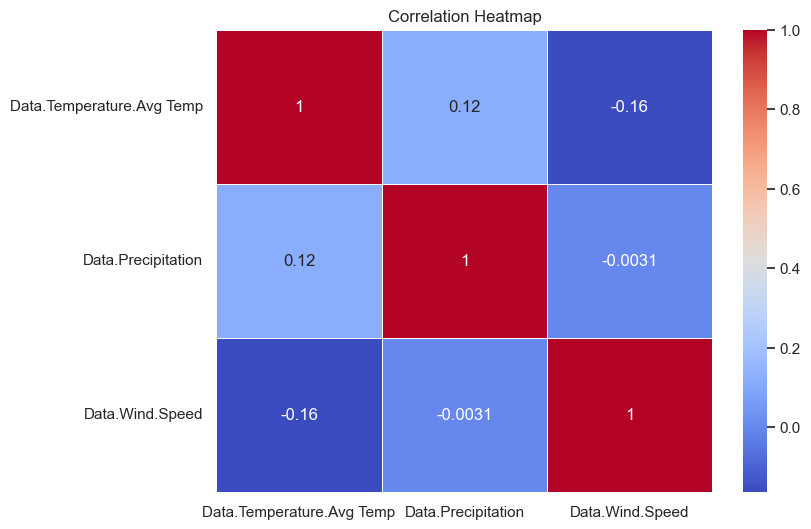

In [33]:
# Correlation analysis between temperature, precipitation, and wind speed
correlation_matrix = weather_data[['Data.Temperature.Avg Temp', 'Data.Precipitation', 'Data.Wind.Speed']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Temperature and Precipitation:** Correlation coefficient of 0.12, indicating a weak positive relationship. This suggests that higher temperatures are slightly associated with more precipitation, but the relationship is not strong.
**Temperature and Wind Speed:** Correlation coefficient of -0.16, indicating a weak negative relationship. This suggests that higher temperatures are slightly associated with lower wind speeds, but again, the relationship is not strong.
**Precipitation and Wind Speed:** Correlation coefficient close to 0, indicating no significant relationship between these two variables.